# <center> Tarea 2

## <center> Resolución analítica Oppenheim Schafer
***
Tenemos una señal impulso, la cual la definiremos como:
$$
\begin{align*}
h[n] &= u[n]-u[n-N] \\
& =\begin{cases}
1 & \text{para } 0\leq n \leq N-1 \\
0 & \text{otro caso}
\end{cases} 
\end{align*}
$$ 

donde $u[n]$ es un escalón unitario centrado en cero. 

Además, tenemos una función exponencial, la cual definiremos como: $x[n]=a^{n}u[n]$.
Realizaremos una suma de convolución, la cual denominaremos como $y[n]=x[n]*h[n]$. Sabemos por definición que la suma de convolución nos resulta de la siguiente manera:
$$
\begin{align*}
y[n]&= \sum_{k=0}^{\infty}  x[k] \cdot h[n-k]
\end{align*}
$$ 


Existen tres casos resultantes de esta convolución:
 + i) $n<0$
  
   + El resultado de la convolución sería igual a 0, pues no comparten datos en esta restricción.


 + ii) $\quad n \geq 0$ ; $n-(N-1)\leq 0$
 
   + En este caso, nuestro $n$ queda entre $0\leq n \leq N-1$. Para resolver esto, utilizaremos la fórmula general: 
    $$
    \begin{align*}
    \sum_{k=0}^{n} a^{k} 
    \end{align*}
    $$ 
   + Esta expresión es igual a $$\frac{a^0-a^{n+1}}{1-a} = \frac{1-a^{n+1}}{1-a}$$
   + La demostración la puede encontrar en el siguiente video: [Suma de una serie de potencias](https://www.youtube.com/watch?app=desktop&v=ZBagdQmAdQw)
   + Por lo tanto, nuestra convolución para $0\leq n \leq N-1$ es igual a $\frac{1-a^{n+1}}{1-a}$


+ iii) $n-(N-1)>0$
   + Para este caso, utilizaremos nuevamente la fórmula general, la cual nos queda:
  $$
  \begin{align*}
  \sum_{k=n-(N-1)}^{n} a^{k} 
  \end{align*}
  $$
   + Esta expresión nos quedaría igual a $$\frac{a^{n-(N-1)}-a^{n+1}}{1-a} = a^{n-(N-1)} [\frac{1-a^{n+1}}{1-a}]$$
   + Por lo tanto, nuestra convolución para $n-(N-1)>0$ es igual a $a^{n-(N-1)} [\frac{1-a^{n+1}}{1-a}]$

#### Por lo tanto, nuestra convolución $y[n]$, quedará expresada como:
$$
\begin{align*}
y[n] \ & =\begin{cases}
0 & \text{para } n < 0 \\
\frac{1-a^{n+1}}{1-a} & \text{para } 0\leq n \leq N-1 \\
a^{n-(N-1)} [\frac{1-a^{n+1}}{1-a}] & \text{para } n-(N-1)>0
\end{cases}
\end{align*}
$$ 

***

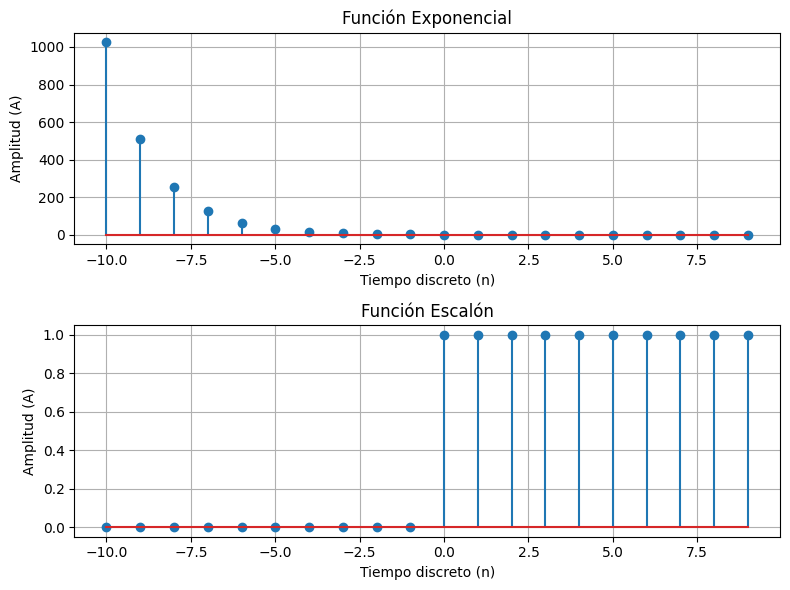

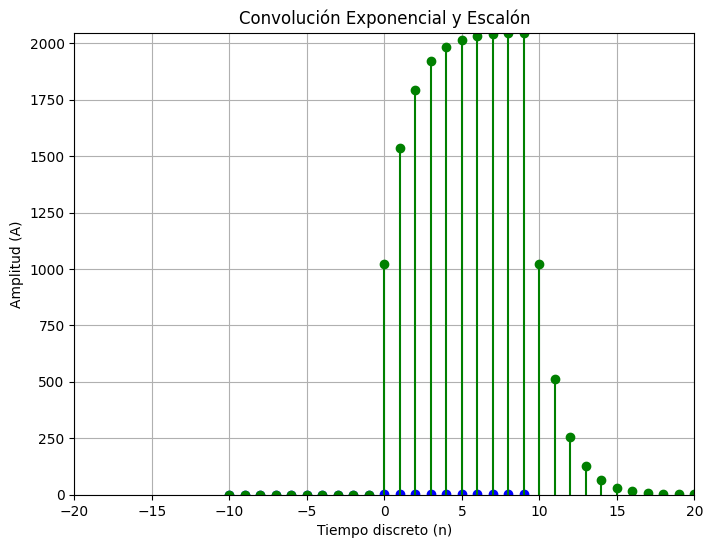

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Función escalón
def escalon(n):
    return 1. * (n >= 0)

# Exponencial real
def exponencial(a, n):
    return a ** n

# Parámetros
a = 0.5
n = np.arange(-10, 10)

# Funciones
exp = exponencial(a, n)
esc = escalon(n)

# Gráficas estáticas de las funciones
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Exponencial
axs[0].stem(n, exp)
axs[0].set_xlabel('Tiempo discreto (n)')
axs[0].set_ylabel('Amplitud (A)')
axs[0].set_title('Función Exponencial')
axs[0].grid(True)

# Escalón
axs[1].stem(n, esc)
axs[1].set_xlabel('Tiempo discreto (n)')
axs[1].set_ylabel('Amplitud (A)')
axs[1].set_title('Función Escalón')
axs[1].grid(True)
fig.tight_layout()

# Convolución
conv = np.convolve(exp, esc)

# Configuración de la figura
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Tiempo discreto (n)')
ax.set_ylabel('Amplitud (A)')
ax.set_title('Convolución Exponencial y Escalón')
ax.grid(True)

# Graficar la función escalón
ax.stem(n, esc, linefmt='b-', markerfmt='bo', basefmt=' ')

# Graficar la función exponencial
exp_line, = ax.plot(n, exp, 'r--', label='Exponencial')

# Configuración para la animación
markerline, stemlines, baseline = ax.stem([0], [0], linefmt='g-', markerfmt='go', basefmt=' ')

ax.set_xlim(-20, 20)
ax.set_ylim(0, np.max(conv) + 1)

# Función de inicialización para la animación 
def init(): 
    exp_line.set_data([], [])
    markerline.set_data([], [])
    stemlines.set_segments([])
    baseline.set_data([], [])
    return exp_line, markerline, stemlines, baseline
    
# def init():: Define la función init() que se ejecutará al inicio de la animación para configurar los datos iniciales.

# exp_line.set_data([], []): Borra los datos de una línea en el gráfico.

# markerline.set_data([], []): Borra los datos de los marcadores en el gráfico.

# stemlines.set_segments([]): Borra los segmentos de las lineas verticales del grafico

# baseline.set_data([], []): Borra los datos de la línea base en el gráfico.

# return lo que hace es devolver los objetos actualizados, la animación comienza con estos objetos en un estado inicial vacío.


# Función de actualización para la animación
def update(frame):
    n_conv = np.arange(-10, -10 + frame + 1)
    y_conv = conv[:frame + 1]
    markerline.set_data(n_conv, y_conv)
    segments = np.zeros((len(n_conv), 2, 2))
    for i in range(len(n_conv)):
        segments[i] = [[n_conv[i], 0], [n_conv[i], y_conv[i]]]
    stemlines.set_segments(segments)
    baseline.set_data([n_conv[0], n_conv[-1]], [0, 0])
    exp_line.set_data(n, exponencial(a, n - frame))
    return exp_line, markerline, stemlines, baseline

# La función update(frame) define cómo se actualizan los datos en cada cuadro de la animación

# Se genera un array n_conv que define los valores x de los datos que se trazarán en la animación.

# Se define un array y_conv que representa los valores y de los datos que se trazarán en la animación.

# Se actualizan los datos del marcador (markerline) con los nuevos valores de n_conv y y_conv.

# Se crea un array segments para definir los segmentos de las líneas verticales en el gráfico.

# Se recorre cada índice i en el rango de la longitud de n_conv y se actualiza segments con las coordenadas de los segmentos de las líneas verticales.

# Se actualizan los segmentos de las líneas verticales en el gráfico con los nuevos valores definidos en segments.

# Se asegura que la línea base (baseline) se extienda desde el primer hasta el último punto trazado en el gráfico, manteniéndose en la posición y=0

# Se actualizan los datos de la línea exponencial (exp_line) para el cuadro actual de la animación

# Finalmente, la función devuelve los objetos exp_line, markerline, stemlines y baseline actualizados.



# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(conv), init_func=init, blit=True, interval=200)

# animation.FuncAnimation(): Esta función crea una animación.

# fig: Es la figura sobre la cual se dibujará la animación.

# update: Es la función que se llamará en cada cuadro para actualizar la animación.

# frames=len(conv): Indica la cantidad total de cuadros en la animación, que es igual a la longitud de la lista conv.

# init_func=init: Es la función de inicialización que se llama una vez antes de comenzar la animación.

# blit=True: Indica si se debe usar blitting para optimizar la animación. El blitting es una técnica de dibujo que puede acelerar la animación.

# interval=200: Especifica el intervalo de tiempo en milisegundos entre cuadros de la animación.


# Habilitar la visualización de animaciones en formato HTML
plt.rcParams['animation.html'] = 'jshtml'

# plt.rcParams: Este es un diccionario que contiene la configuración global de Matplotlib.

#'animation.html' = 'jshtml': Establece el formato de visualización de la animación. 'jshtml' significa que se mostrará en formato HTML usando JavaScript.


# Mostrar la animación
ani

